In [1]:
!pip install -U -q PyDrive

     |████████████████████████████████| 993kB 47.3MB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
import pandas as pd
import os
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: distracted_driver_new_dataset2.zip, id: 1go3PFhUyBUi65n1woGWfT5epiYxLPf4x
title: MAJOR PROJECT PRLLER BLADE REPORT.doc, id: 1JW6qNGfmrfv3SFs-Odd8LdnIJLXjlH4Q
title: CV.pdf, id: 1_yyVXPUaKYucxcsLpFmbYsQ4KAEPuy6i
title: Resume.docx, id: 1iKCB7fx7S4oN6vb-LiRMnJNb-uO8bco2
title: mini project report.pdf, id: 1kMMBddqUYX_QwPePE87UsbchNORj9yc-
title: seminar.pptx, id: 1MW1vBczfjpJ9Iw9coXNkmPAqPuLvu6Ma
title: Colab Notebooks, id: 1x1sF1lwVFls5qDkS8h2YwrdDyb4mgVU9
title: Getting started, id: 0B_s1H5Po7LLdc3RhcnRlcl9maWxl


In [0]:
downloaded = drive.CreateFile({'id': '1go3PFhUyBUi65n1woGWfT5epiYxLPf4x'})
downloaded.GetContentFile('distracted_driver_new_dataset2.zip')

In [6]:
!unzip distracted_driver_new_dataset2.zip

Archive:  distracted_driver_new_dataset2.zip
 extracting: imgs.zip                


In [7]:
os.listdir()

['.config',
 'adc.json',
 'imgs.zip',
 'distracted_driver_new_dataset2.zip',
 'sample_data']

In [0]:

!unzip imgs.zip

In [9]:
os.listdir()

['.config',
 'adc.json',
 'imgs.zip',
 'distracted_driver_new_dataset2.zip',
 'imgs',
 'sample_data']

In [0]:
#importing libraries for the data processing and model.
import pandas as pd
import numpy as np 
import os
import random
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [0]:
# defining the path and classes.
directory = r"imgs/train"
test_data = r"imgs/test"
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [0]:
# defining a shape to be used for our models.
img_size = 240

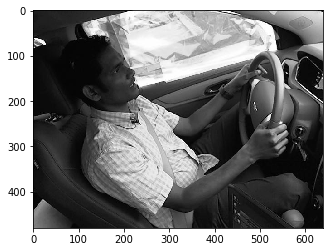

In [13]:
# Train class image for display.
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),0)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [0]:
# creating a training dataset.
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(img_size,img_size))
            training_data.append([
                new_img,class_num])

In [0]:
create_training_data()

In [16]:
print(len(training_data))

6000


In [0]:
random.shuffle(training_data)

In [0]:
x = []
y = []

In [0]:
for features, label in training_data:
    x.append(features)
    y.append(label)

In [20]:
x[0].shape

(240, 240)

In [21]:
len(x)

6000

In [22]:
X = np.array(x).reshape(-1,img_size,img_size,1)
X[0].shape

(240, 240, 1)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=96)

In [0]:
Y_train = utils.to_categorical(y_train,num_classes=10)
Y_test = utils.to_categorical(y_test,num_classes=10)

In [0]:
model = models.Sequential()

In [26]:
## CNN Layer 1
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(240,240,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN Layer 2
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN Layer 3
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))
## Dense & Output
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      320       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 238, 238, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 238, 238, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 119, 64)      18496     
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 119, 119, 64)      256       
__________

In [0]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [0]:
batch_size = 50
n_epochs = 5

In [30]:
results = model.fit(x_train,Y_train,
                    batch_size=batch_size,epochs=n_epochs,
                    verbose=1,
                    validation_data=(x_test,Y_test))
                   

Train on 4200 samples, validate on 1800 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
4200/4200 [==============================] - 38s 9ms/sample - loss: 1.9507 - acc: 0.3707 - val_loss: 1.1321 - val_acc: 0.6650
Epoch 2/5
4200/4200 [==============================] - 31s 7ms/sample - loss: 0.7294 - acc: 0.7636 - val_loss: 0.4006 - val_acc: 0.8922
Epoch 3/5
4200/4200 [==============================] - 32s 8ms/sample - loss: 0.3404 - acc: 0.8950 - val_loss: 0.2137 - val_acc: 0.9372
Epoch 4/5
4200/4200 [==============================] - 32s 8ms/sample - loss: 0.2062 - acc: 0.9360 - val_loss: 0.1667 - val_acc: 0.9511
Epoch 5/5
4200/4200 [==============================] - 32s 8ms/sample - loss: 0.1264 - acc: 0.9619 - val_loss: 0.1120 - val_acc: 0.9728


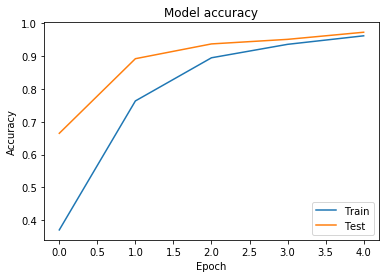

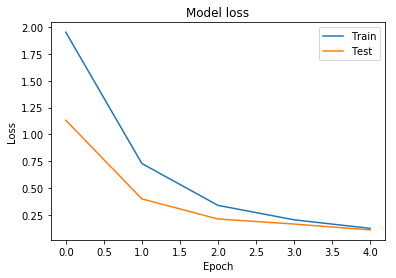

In [31]:
# Plot training & validation accuracy values
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


Testing

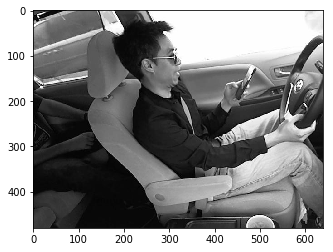

In [32]:
# Test class image for display.
for img in os.listdir(test_data):
    img_array = cv2.imread(os.path.join(test_data,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

In [0]:
# Creating a test dataset.
testing_data = []
i = 0
def create_testing_data():        
    for img in os.listdir(test_data):
        img_array = cv2.imread(os.path.join(test_data,img),cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array,(img_size,img_size))
        testing_data.append([img,
            new_img])

In [0]:
create_testing_data()

Predicted: 6


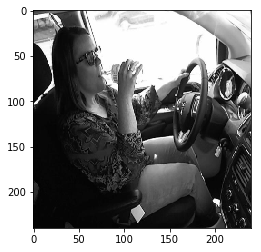

In [35]:
test_img=testing_data[123][1]
test_data = np.array(test_img).reshape(-1,img_size,img_size,1)
preds = model.predict(test_data)
print('Predicted: {}'.format(np.argmax(preds)))
new_img = cv2.resize(test_img,(img_size,img_size))
plt.imshow(new_img,cmap='gray')
plt.show()

    c0: safe driving
    c1: texting - right
    c2: talking on the phone - right
    c3: texting - left
    c4: talking on the phone - left
    c5: operating the radio
    c6: drinking
    c7: reaching behind
    c8: hair and makeup
    c9: talking to passenger